# Polymer Collapse

This is a simple model for the collapse of a polymer due to an intra-molecular bond. The unfolded state can be in $g$ states (degeneracy) while the collapsed (ground) state only has a single state. The bond energy is given by the parameter $\epsilon$. We can now write a partition function:
$$
q = \sum_j^{levels} g_j e^{-\epsilon_j / k_BT} = 1 + g e^{-\epsilon/k_BT}
$$
The probability to be in any of the $g$ unfolded states is $p_{open} = ge^{-\epsilon/k_BT}/q$ while the probability to be in the folded state is $p_{collapsed} = 1/q$.
The example can be found in the book of Dill and Bromberg.
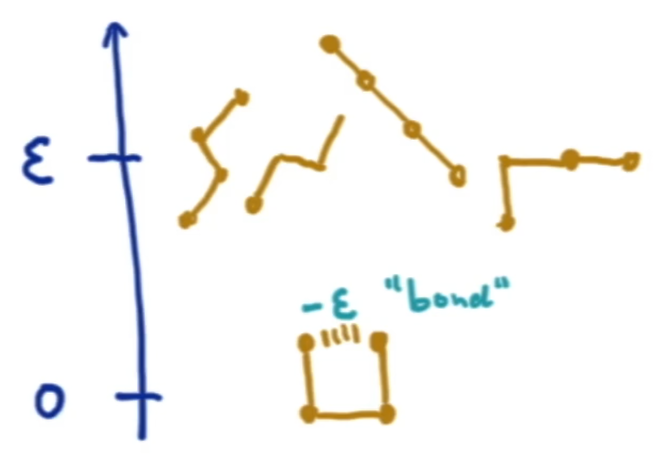

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.constants import h, c, k, N_A # import physical constants

In [2]:
def q(T, eps, g):
    ''' Partition function '''
    beta_eps = eps * 1000 / k / N_A / T # convert from kJ/mol -> kT
    return 1 + g * np.exp(-beta_eps)

def p_open(T, eps, g):
    ''' Probability to be in _any_ of the open states '''
    beta_eps = eps * 1000 / k / N_A / T # convert from kJ/mol -> kT
    return g * np.exp(-beta_eps) / q(T, eps, g)

def p_collapsed(T, eps, g):
    ''' Probability to be in the closed state '''
    return np.exp(0) / q(T, eps, g)

T = np.linspace(0.01, 50, 100)

def plot(eps=0.2, g=4):
    plt.plot(T, p_open(T, eps, g), label="open")
    plt.plot(T, p_collapsed(T, eps, g), label="collapsed")
    plt.legend(frameon=False, loc=0)
    plt.xlabel('Temperature')
    plt.ylabel('Probability, $p$')
    
i = interact(plot, eps=(0.2, 10, 0.05), g=(1, 100, 1), continuous_update=False)
i.widget.children[0].description=r'$\epsilon$'
i.widget.children[1].description=r'$g$';

interactive(children=(FloatSlider(value=0.2, description='eps', max=10.0, min=0.2, step=0.05), IntSlider(value…